In [1]:
import pandas as pd
import numpy as np
from datetime import date
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

from baggingPU import BaggingClassifierPU

# Merging Data

In [2]:
#Load the data
clients = pd.read_csv('./Data/CLIENTS.csv', delimiter=';')
cmd = pd.read_csv('./Data/cmd.csv', delimiter=';')
web_201708 = pd.read_csv('./Data/LOG_WEB_201708.csv', delimiter=';')
web_201709 = pd.read_csv('./Data/LOG_WEB_201709.csv', delimiter=';')
web_201710 = pd.read_csv('./Data/LOG_WEB_201710.csv', delimiter=';')
web_201711 = pd.read_csv('./Data/LOG_WEB_201711.csv', delimiter=';')
web_201712 = pd.read_csv('./Data/LOG_WEB_201712.csv', delimiter=';')
web_201801 = pd.read_csv('./Data/LOG_WEB_201801.csv', delimiter=';')
web_201802 = pd.read_csv('./Data/LOG_WEB_201802.csv', delimiter=';')
web_201803 = pd.read_csv('./Data/LOG_WEB_201803.csv', delimiter=';')
conversion = pd.read_csv('./Data/TABLE_CONVERSION.csv', delimiter=';')

C:\Users\Julien\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
web_201708.head(10)

,Unnamed: 0,VISITOR_ID,CONNECTED_SESSION,ID_SESSION,SESSION_START_DATE,EVENT_DATE,PAGES,GLOBAL_SOURCES,DEVICE_TYPE,DEVICE_MODEL,LOADINGS
0,0,381225,OUI,1,2017-08-08 00:02:06,2017-08-08 00:02:06,accueil,Liens Sponsorisés,Smartphone,NaN,1
1,1,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:03:27,accueil,Accès Direct,Ordinateur,NaN,1
2,2,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:22:04,accueil,Accès Direct,Ordinateur,NaN,1
3,3,706588,OUI,23,2017-08-08 00:01:29,2017-08-08 00:01:32,accueil,Accès Direct,Ordinateur,NaN,1
4,4,0,NON,27,2017-08-08 00:01:30,2017-08-08 00:14:08,accueil,Accès Direct,Ordinateur,NaN,1
5,5,0,NON,29,2017-08-08 00:01:31,2017-08-08 00:03:09,accueil,Accès Direct,Tablette,iPad,1
6,6,0,NON,30,2017-08-08 00:01:31,2017-08-08 00:06:02,accueil,Accès Direct,Smartphone,iPhone,1
7,7,0,NON,33,2017-08-08 00:01:54,2017-08-08 00:01:54,accueil,Affiliation et partenaires,Ordinateur,NaN,1
8,8,0,NON,34,2017-08-08 00:01:32,2017-08-08 00:08:15,accueil,Accès Direct,Smartphone,sm-g935f,1
9,9,0,NON,35,2017-08-08 00:01:32,2017-08-08 00:01:32,accueil,Moteurs,Smartphone,iPhone,1


In [4]:
#Remove the unecessary column Unnamed: 0 from all files
clients= clients.drop("Unnamed: 0", axis=1)
cmd= cmd.drop("Unnamed: 0", axis=1)
web_201708= web_201708.drop("Unnamed: 0", axis=1)
web_201709= web_201709.drop("Unnamed: 0", axis=1)
web_201709= web_201709.drop("Unnamed: 0.1", axis=1)
web_201710= web_201710.drop("Unnamed: 0", axis=1)
web_201711= web_201711.drop("Unnamed: 0", axis=1)
web_201712= web_201712.drop("Unnamed: 0", axis=1)
web_201801= web_201801.drop("Unnamed: 0", axis=1)
web_201802= web_201802.drop("Unnamed: 0", axis=1)
web_201803= web_201803.drop("Unnamed: 0", axis=1)
conversion= conversion.drop("Unnamed: 0", axis=1)

In [5]:
#Remove the Missing values
web_201708 = web_201708[web_201708.VISITOR_ID != 0]
web_201709 = web_201709[web_201709.VISITOR_ID != 0]
web_201710 = web_201710[web_201710.VISITOR_ID != 0]
web_201711 = web_201711[web_201711.VISITOR_ID != 0]
web_201712 = web_201712[web_201712.VISITOR_ID != 0]
web_201801 = web_201801[web_201801.VISITOR_ID != 0]
web_201802 = web_201802[web_201802.VISITOR_ID != 0]
web_201803 = web_201803[web_201803.VISITOR_ID != 0]

In [6]:
#Merge all web datasets together by appending them all to a new dataframe
web = web_201708.append(web_201709,ignore_index = True) 
web = web.append(web_201710,ignore_index = True)
web = web.append(web_201711,ignore_index = True)
web = web.append(web_201712,ignore_index = True)
web = web.append(web_201801,ignore_index = True)
web = web.append(web_201802,ignore_index = True)
web = web.append(web_201803,ignore_index = True)

In [7]:
web.to_csv('./Data/web.csv', sep=';', index_label=False, encoding='utf-8')

In [8]:
data_web = pd.read_csv('./Data/web.csv', delimiter=';')

In [9]:
data_web.head(10)

,VISITOR_ID,CONNECTED_SESSION,ID_SESSION,SESSION_START_DATE,EVENT_DATE,PAGES,GLOBAL_SOURCES,DEVICE_TYPE,DEVICE_MODEL,LOADINGS
0,381225,OUI,1,2017-08-08 00:02:06,2017-08-08 00:02:06,accueil,Liens Sponsorisés,Smartphone,NaN,1
1,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:03:27,accueil,Accès Direct,Ordinateur,NaN,1
2,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:22:04,accueil,Accès Direct,Ordinateur,NaN,1
3,706588,OUI,23,2017-08-08 00:01:29,2017-08-08 00:01:32,accueil,Accès Direct,Ordinateur,NaN,1
4,572702,OUI,64,2017-08-08 00:03:19,2017-08-08 00:03:19,accueil,Moteurs,Tablette,101 Oxygen,1
5,572702,OUI,64,2017-08-08 00:03:19,2017-08-08 00:09:42,accueil,Moteurs,Tablette,101 Oxygen,1
6,572702,OUI,64,2017-08-08 00:03:19,2017-08-08 00:10:36,accueil,Moteurs,Tablette,101 Oxygen,1
7,698042,OUI,201,2017-08-08 00:14:41,2017-08-08 00:14:41,accueil,Liens Sponsorisés,Smartphone,sm-j510fn,1
8,489527,OUI,203,2017-08-08 00:15:00,2017-08-08 00:15:00,accueil,Liens Sponsorisés,Ordinateur,NaN,1
9,489527,OUI,203,2017-08-08 00:15:00,2017-08-08 00:15:40,accueil,Liens Sponsorisés,Ordinateur,NaN,1


In [10]:
#Merge web data with conversion table
data_web_conver = data_web.merge(conversion, how = 'inner', on = ['VISITOR_ID'])

In [11]:
data_web_conver.head(1000)

,VISITOR_ID,CONNECTED_SESSION,ID_SESSION,SESSION_START_DATE,EVENT_DATE,PAGES,GLOBAL_SOURCES,DEVICE_TYPE,DEVICE_MODEL,LOADINGS,CLIENT_NUMBER
0,381225,OUI,1,2017-08-08 00:02:06,2017-08-08 00:02:06,accueil,Liens Sponsorisés,Smartphone,NaN,1,2912426551072989703
1,381225,OUI,27342,2017-08-08 21:58:40,2017-08-08 22:09:26,accueil,Accès Direct,Smartphone,NaN,1,2912426551072989703
2,381225,OUI,48046,2017-08-09 20:33:28,2017-08-09 20:33:28,accueil,Accès Direct,Smartphone,NaN,1,2912426551072989703
3,381225,OUI,48046,2017-08-09 20:33:28,2017-08-09 20:33:56,accueil,Accès Direct,Smartphone,NaN,1,2912426551072989703
4,381225,OUI,15528,2017-08-11 10:15:09,2017-08-11 10:22:22,accueil,Moteurs,Ordinateur,NaN,1,2912426551072989703
5,381225,OUI,15528,2017-08-11 10:15:09,2017-08-11 10:35:08,accueil,Moteurs,Ordinateur,NaN,1,2912426551072989703
6,381225,OUI,15528,2017-08-11 10:15:09,2017-08-11 10:38:52,accueil,Moteurs,Ordinateur,NaN,1,2912426551072989703
7,381225,OUI,15528,2017-08-11 10:15:09,2017-08-11 10:41:08,accueil,Moteurs,Ordinateur,NaN,1,2912426551072989703
8,381225,OUI,15528,2017-08-11 10:15:09,2017-08-11 10:48:52,accueil,Moteurs,Ordinateur,NaN,1,2912426551072989703
9,381225,OUI,15528,2017-08-11 10:15:09,2017-08-11 10:56:10,accueil,Moteurs,Ordinateur,NaN,1,2912426551072989703


In [12]:
#Data manipulation: getting the good format for date informations
data_web_conver['SESSION_START_DATE']=pd.to_datetime(data_web_conver['SESSION_START_DATE'])
data_web_conver['activity_date']=data_web_conver['SESSION_START_DATE'].apply(lambda x: x.strftime('%Y-%m-%d'))
data_web_conver['activity_date']=pd.to_datetime(data_web_conver['activity_date'])
cmd['activity_date'] = pd.to_datetime(cmd['ORDER_DATE'])

In [13]:
data_web_conver.head(10000)

,VISITOR_ID,CONNECTED_SESSION,ID_SESSION,SESSION_START_DATE,EVENT_DATE,PAGES,GLOBAL_SOURCES,DEVICE_TYPE,DEVICE_MODEL,LOADINGS,CLIENT_NUMBER,activity_date
0,381225,OUI,1,2017-08-08 00:02:06,2017-08-08 00:02:06,accueil,Liens Sponsorisés,Smartphone,NaN,1,2912426551072989703,2017-08-08
1,381225,OUI,27342,2017-08-08 21:58:40,2017-08-08 22:09:26,accueil,Accès Direct,Smartphone,NaN,1,2912426551072989703,2017-08-08
2,381225,OUI,48046,2017-08-09 20:33:28,2017-08-09 20:33:28,accueil,Accès Direct,Smartphone,NaN,1,2912426551072989703,2017-08-09
3,381225,OUI,48046,2017-08-09 20:33:28,2017-08-09 20:33:56,accueil,Accès Direct,Smartphone,NaN,1,2912426551072989703,2017-08-09
4,381225,OUI,15528,2017-08-11 10:15:09,2017-08-11 10:22:22,accueil,Moteurs,Ordinateur,NaN,1,2912426551072989703,2017-08-11
5,381225,OUI,15528,2017-08-11 10:15:09,2017-08-11 10:35:08,accueil,Moteurs,Ordinateur,NaN,1,2912426551072989703,2017-08-11
6,381225,OUI,15528,2017-08-11 10:15:09,2017-08-11 10:38:52,accueil,Moteurs,Ordinateur,NaN,1,2912426551072989703,2017-08-11
7,381225,OUI,15528,2017-08-11 10:15:09,2017-08-11 10:41:08,accueil,Moteurs,Ordinateur,NaN,1,2912426551072989703,2017-08-11
8,381225,OUI,15528,2017-08-11 10:15:09,2017-08-11 10:48:52,accueil,Moteurs,Ordinateur,NaN,1,2912426551072989703,2017-08-11
9,381225,OUI,15528,2017-08-11 10:15:09,2017-08-11 10:56:10,accueil,Moteurs,Ordinateur,NaN,1,2912426551072989703,2017-08-11


In [14]:
cmd.head()

,CLIENT_NUMBER,ORDER_NUMBER,ORDER_DATE,ORDER_CHANNEL,PRE_TAX_AMOUNT,CVIC,activity_date
0,7178742953965764755,2302390,2010-01-05,Telephone,84.28,True,2010-01-05
1,-2373390172893352743,2302392,2010-01-17,Telephone,97.85,True,2010-01-17
2,-240944575938990062,2302393,2010-01-05,Telephone,58.45,True,2010-01-05
3,1720395480962300217,2302394,2010-01-05,Telephone,31.19,True,2010-01-05
4,7161131950067982732,2302396,2010-01-14,Telephone,37.45,True,2010-01-14


In [15]:
#Merge dataset with the commands dataset using the client number variable
data_web_conver_cmd = data_web_conver.merge(cmd, how = 'inner', on = ['CLIENT_NUMBER','activity_date'])

In [16]:
#Final merger with client dataset
data_web_conver_cmd_cust = data_web_conver_cmd.merge(clients, how = 'inner', on = ['CLIENT_NUMBER'])

In [17]:
data_web_conver_cmd_cust.head(100)

,VISITOR_ID,CONNECTED_SESSION,ID_SESSION,SESSION_START_DATE,EVENT_DATE,PAGES,GLOBAL_SOURCES,DEVICE_TYPE,DEVICE_MODEL,LOADINGS,...,activity_date,ORDER_NUMBER,ORDER_DATE,ORDER_CHANNEL,PRE_TAX_AMOUNT,CVIC,CREATION_DATE,GENDER,BIRTH_YEAR,ZIPCODE
0,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:03:27,accueil,Accès Direct,Ordinateur,NaN,1,...,2017-08-08,10139781,2017-08-08,Internet,61.68,False,2016-01-31,M,NaN,38160
1,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:03:27,accueil,Accès Direct,Ordinateur,NaN,1,...,2017-08-08,10139784,2017-08-08,Internet,218.66,False,2016-01-31,M,NaN,38160
2,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:22:04,accueil,Accès Direct,Ordinateur,NaN,1,...,2017-08-08,10139781,2017-08-08,Internet,61.68,False,2016-01-31,M,NaN,38160
3,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:22:04,accueil,Accès Direct,Ordinateur,NaN,1,...,2017-08-08,10139784,2017-08-08,Internet,218.66,False,2016-01-31,M,NaN,38160
4,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:01:32,mon panier,Accès Direct,Ordinateur,NaN,1,...,2017-08-08,10139781,2017-08-08,Internet,61.68,False,2016-01-31,M,NaN,38160
5,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:01:32,mon panier,Accès Direct,Ordinateur,NaN,1,...,2017-08-08,10139784,2017-08-08,Internet,218.66,False,2016-01-31,M,NaN,38160
6,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:02:31,mon panier,Accès Direct,Ordinateur,NaN,1,...,2017-08-08,10139781,2017-08-08,Internet,61.68,False,2016-01-31,M,NaN,38160
7,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:02:31,mon panier,Accès Direct,Ordinateur,NaN,1,...,2017-08-08,10139784,2017-08-08,Internet,218.66,False,2016-01-31,M,NaN,38160
8,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:02:45,mon panier,Accès Direct,Ordinateur,NaN,1,...,2017-08-08,10139781,2017-08-08,Internet,61.68,False,2016-01-31,M,NaN,38160
9,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:02:45,mon panier,Accès Direct,Ordinateur,NaN,1,...,2017-08-08,10139784,2017-08-08,Internet,218.66,False,2016-01-31,M,NaN,38160


In [18]:
uuu = data_web_conver_cmd_cust.PAGES.unique()
for i in uuu:
    print(i)

accueil
mon panier
ma livraison
commander/recapitulatif.htm
mon paiement
confirmation d achat cb
le-blanc-d-ete
category 3::category 3 fantaisie::fiche produit::-1385378180471405910
ajout au panier
category 1::category 1 fantaisie::fiche produit::-2005900176389340248
category 13::category 13 fantaisies::fiche produit::-3224319679009765311
soldes
category 1::sous_category_-5263210972321371597::fiche produit::-164978046006783271
category 1::sous_category_-5263210972321371597::fiche produit::-4644656734540558349
category 1::category 1 uni::fiche produit::6903122363243348096
category 1::sous_category_-5263210972321371597::fiche produit::1384021786350780624
category 5::category 5 unis::fiche produit::-900085704266846683
vente-privee
mon compte ::accueil
mon compte ::parametres de mon compte::gerer mon compte
identification::accueil
category 4::fiche produit::-700690506106312427
category 3::category 3 uni::fiche produit::1461092051685183737
category 3::category 3 fantaisie::fiche produit::-6

In [19]:
#Select only data referring to the purchase moment
data_web_conver_cmd_cust_CB = data_web_conver_cmd_cust[data_web_conver_cmd_cust.PAGES == 'confirmation d achat cb']

In [20]:
data_web_conver_cmd_cust_CB.shape

(76940, 21)

In [21]:
#Drop duplicates and select only the commands from internet
train = data_web_conver_cmd_cust_CB.drop_duplicates(subset='ORDER_NUMBER', keep="last")
train = train[train['ORDER_CHANNEL'] == 'Internet']

In [22]:
#Reset indices
train = train.reset_index()
train = train.drop("index", axis=1)

In [23]:
train.to_csv('./Data/train.csv', sep=';', index_label=False, encoding='utf-8')

# Feature selection

In [24]:
train = pd.read_csv('./Data/train.csv', delimiter=';')

In [25]:
train

,VISITOR_ID,CONNECTED_SESSION,ID_SESSION,SESSION_START_DATE,EVENT_DATE,PAGES,GLOBAL_SOURCES,DEVICE_TYPE,DEVICE_MODEL,LOADINGS,...,activity_date,ORDER_NUMBER,ORDER_DATE,ORDER_CHANNEL,PRE_TAX_AMOUNT,CVIC,CREATION_DATE,GENDER,BIRTH_YEAR,ZIPCODE
0,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:33:37,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,2017-08-08 00:00:00,10139781,2017-08-08,Internet,61.68,False,2016-01-31,M,NaN,38160
1,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:33:37,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,2017-08-08 00:00:00,10139784,2017-08-08,Internet,218.66,False,2016-01-31,M,NaN,38160
2,706588,OUI,23,2017-08-08 00:01:29,2017-08-08 00:29:27,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,2017-08-08 00:00:00,10139782,2017-08-08,Internet,19.08,False,2017-08-08,Mme,NaN,54210
3,572702,OUI,64,2017-08-08 00:03:19,2017-08-08 00:08:59,confirmation d achat cb,Moteurs,Tablette,101 Oxygen,1,...,2017-08-08 00:00:00,10139780,2017-08-08,Internet,97.50,True,2003-10-06,Mme,1949.0,95000
4,572702,OUI,13844,2017-12-31 15:26:38,2017-12-31 16:46:28,confirmation d achat cb,Liens Sponsorisés,Ordinateur,NaN,1,...,2017-12-31 00:00:00,10533538,2017-12-31,Internet,145.50,True,2003-10-06,Mme,1949.0,95000
5,698042,OUI,19054,2017-10-03 16:17:56,2017-10-03 16:33:43,confirmation d achat cb,Accès Direct,Smartphone,sm-j510fn,1,...,2017-10-03 00:00:00,10283210,2017-10-03,Internet,117.01,False,2017-07-05,Mle,1993.0,82000
6,528544,OUI,40854,2017-10-10 15:56:06,2017-10-10 16:29:38,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,2017-10-10 00:00:00,10303998,2017-10-10,Internet,87.42,False,2015-02-03,Mme,1960.0,77300
7,528544,OUI,53185,2017-10-29 17:10:07,2017-10-29 19:31:40,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,2017-10-29 00:00:00,10342936,2017-10-29,Internet,76.08,False,2015-02-03,Mme,1960.0,77300
8,528544,OUI,19,2017-11-25 00:00:13,2017-11-25 01:45:33,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,2017-11-25 00:00:00,10420827,2017-11-25,Internet,166.25,False,2015-02-03,Mme,1960.0,77300
9,528544,OUI,19,2017-11-25 00:00:13,2017-11-25 01:45:33,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,2017-11-25 00:00:00,10420842,2017-11-25,Internet,166.25,False,2015-02-03,Mme,1960.0,77300


In [26]:
#Drop unnecessary columns 
train1 = train.drop("CONNECTED_SESSION", axis=1)
train1 = train1.drop("ID_SESSION", axis=1)
train1 = train1.drop("SESSION_START_DATE", axis=1)
train1 = train1.drop("EVENT_DATE", axis=1)
train1 = train1.drop("PAGES", axis=1)
train1 = train1.drop("DEVICE_MODEL", axis=1)
train1 = train1.drop("activity_date", axis=1)
train1 = train1.drop("ORDER_NUMBER", axis=1)
train1 = train1.drop("ORDER_DATE", axis=1)
train1 = train1.drop("ORDER_CHANNEL", axis=1)
train1 = train1.drop("BIRTH_YEAR", axis=1)
train1 = train1.drop("VISITOR_ID", axis=1)
train1 = train1.drop("CLIENT_NUMBER", axis=1)

In [27]:
#Create the seniority (number of days the client has been in the database)
train1['CREATION_DATE']=pd.to_datetime(train1['CREATION_DATE'])

seniority = []
for i in range(0, len(train1.CREATION_DATE)):
    seniority.append((datetime.today() - train1.CREATION_DATE[i]).days) 

seniority = pd.DataFrame(seniority)

In [28]:
#Create new Zipcode variable
#geo = []
#for i in range(0, len(train1.ZIPCODE)):
#    geo.append(str(train1.ZIPCODE[i][:2]))

In [29]:
#Get dummies
sources_dummy = pd.get_dummies(train1.GLOBAL_SOURCES)
device_dummy = pd.get_dummies(train1.DEVICE_TYPE)
gender_dummy = pd.get_dummies(train1.GENDER)

In [30]:
#Add newly created variables to train1
train1 = pd.concat([train1, sources_dummy], axis=1)
train1 = pd.concat([train1, device_dummy], axis=1)
train1 = pd.concat([train1, gender_dummy], axis=1)
train1 = pd.concat([train1, seniority], axis=1)
train1 = train1.rename(index = str, columns = {0: 'seniority'})

In [31]:
#Drop unnecessary columns
train1 = train1.drop("ZIPCODE", axis = 1)
train1 = train1.drop("GLOBAL_SOURCES", axis=1)
train1 = train1.drop("DEVICE_TYPE", axis=1)
train1 = train1.drop("CREATION_DATE", axis=1)
train1 = train1.drop("GENDER", axis=1)

In [32]:
#Remove SOC column
train1 = train1.drop("SOC", axis=1)

In [33]:
#Transform y into 0 or 1 instead of True or False
train1["CVIC"] = train1['CVIC'].astype(int)

In [34]:
train1.to_csv('./Data/train_dummy.csv', sep=';', index_label=False, encoding='utf-8')

# PU learning Model Training

In [35]:
train1 = pd.read_csv('./Data/train_dummy.csv', delimiter=';')

In [36]:
train1

,LOADINGS,PRE_TAX_AMOUNT,CVIC,Accès Direct,Affiliation et partenaires,Email marketing,Liens Sponsorisés,Moteurs,Notoriété,Publicité,...,Sources naturelles personnalisées,Webmails,Ordinateur,Smartphone,TV connectée,Tablette,M,Mle,Mme,seniority
0,1,61.68,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1153
1,1,218.66,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1153
2,1,19.08,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,598
3,1,97.50,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,5653
4,1,145.50,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,5653
5,1,117.01,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,632
6,1,87.42,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1515
7,1,76.08,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1515
8,1,166.25,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1515
9,1,166.25,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1515


In [37]:
#Whole dataset
X = train1.drop("CVIC", axis=1)
y = train1['CVIC']

#We use the BaggingPU classifier, model that is used for a dataset composed of positive unlabelled examples
bc = BaggingClassifierPU(
    DecisionTreeClassifier(),
    n_estimators = 1000,  # 1000 trees as usual
    max_samples = sum(y), # Balance the positives and unlabeled in each bag
    n_jobs = -1           # Use all cores
)
bc.fit(X, y)

BaggingClassifierPU(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          bootstrap=True, bootstrap_features=False, max_features=1.0,
          max_samples=14537, n_estimators=1000, n_jobs=-1, oob_score=True,
          random_state=None, verbose=0, warm_start=False)

In [38]:
train = pd.read_csv('./Data/train.csv', delimiter=';')
output1 = train

#We predict using the fitted model
output1['output_bag_tree'] = bc.oob_decision_function_[:,1]
output1

,VISITOR_ID,CONNECTED_SESSION,ID_SESSION,SESSION_START_DATE,EVENT_DATE,PAGES,GLOBAL_SOURCES,DEVICE_TYPE,DEVICE_MODEL,LOADINGS,...,ORDER_NUMBER,ORDER_DATE,ORDER_CHANNEL,PRE_TAX_AMOUNT,CVIC,CREATION_DATE,GENDER,BIRTH_YEAR,ZIPCODE,output_bag_tree
0,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:33:37,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,10139781,2017-08-08,Internet,61.68,False,2016-01-31,M,NaN,38160,0.863338
1,563053,OUI,13,2017-08-08 00:01:32,2017-08-08 00:33:37,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,10139784,2017-08-08,Internet,218.66,False,2016-01-31,M,NaN,38160,0.824903
2,706588,OUI,23,2017-08-08 00:01:29,2017-08-08 00:29:27,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,10139782,2017-08-08,Internet,19.08,False,2017-08-08,Mme,NaN,54210,0.077510
3,572702,OUI,64,2017-08-08 00:03:19,2017-08-08 00:08:59,confirmation d achat cb,Moteurs,Tablette,101 Oxygen,1,...,10139780,2017-08-08,Internet,97.50,True,2003-10-06,Mme,1949.0,95000,NaN
4,572702,OUI,13844,2017-12-31 15:26:38,2017-12-31 16:46:28,confirmation d achat cb,Liens Sponsorisés,Ordinateur,NaN,1,...,10533538,2017-12-31,Internet,145.50,True,2003-10-06,Mme,1949.0,95000,NaN
5,698042,OUI,19054,2017-10-03 16:17:56,2017-10-03 16:33:43,confirmation d achat cb,Accès Direct,Smartphone,sm-j510fn,1,...,10283210,2017-10-03,Internet,117.01,False,2017-07-05,Mle,1993.0,82000,0.785714
6,528544,OUI,40854,2017-10-10 15:56:06,2017-10-10 16:29:38,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,10303998,2017-10-10,Internet,87.42,False,2015-02-03,Mme,1960.0,77300,0.820915
7,528544,OUI,53185,2017-10-29 17:10:07,2017-10-29 19:31:40,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,10342936,2017-10-29,Internet,76.08,False,2015-02-03,Mme,1960.0,77300,0.480620
8,528544,OUI,19,2017-11-25 00:00:13,2017-11-25 01:45:33,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,10420827,2017-11-25,Internet,166.25,False,2015-02-03,Mme,1960.0,77300,0.376455
9,528544,OUI,19,2017-11-25 00:00:13,2017-11-25 01:45:33,confirmation d achat cb,Accès Direct,Ordinateur,NaN,1,...,10420842,2017-11-25,Internet,166.25,False,2015-02-03,Mme,1960.0,77300,0.377922


In [39]:
traintemp = output1['output_bag_tree'].dropna()

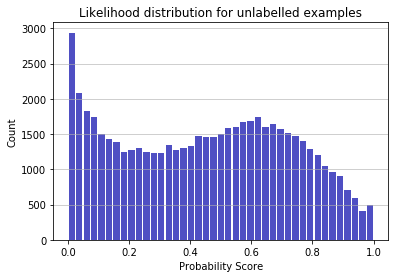

In [40]:
#Visualization of probability score distribution of unlabelled examples 
n, bins, patches = plt.hist(x= traintemp, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
#plt.figure(figsize=(12,9))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Probability Score')
plt.ylabel('Count')
plt.title('Likelihood distribution for unlabelled examples')
plt.savefig('Likelihood distribution for unlabelled examples.png')

In [103]:
#traintemp = traintemp.reset_index()
traintemp2 = traintemp2.drop([traintemp.columns[0]], axis = 'columns')
#modDfObj = dfObj.drop([dfObj.columns[1] , dfObj.columns[2]] ,  axis='columns')

In [117]:
for i in range(0, 56660):
    if traintemp2.iloc[i,0] >= 0.61:
        count = count + 1
count

In [118]:
56661 = x * 2.3
(56661-18525.0)/x = y


18525.0

In [120]:
56661/0.023

2463521.739130435

In [121]:
(56661-18525.0)/2463521.739130435

0.015480277439508656

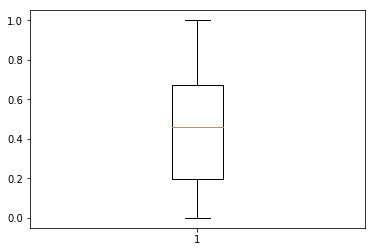

In [41]:
plt.boxplot(traintemp)
plt.show()

In [42]:
output1_c = output1[np.isfinite(output1['output_bag_tree'])]
new_label = []
for index,row in output1_c.iterrows():
        if row[21] > 0.4 :                      #threshold as 0.4
            new_label.append(1)
        else:
            new_label.append(0)
output1_c['output_bag_tree'] = new_label    #whether hidden IMO
percent = sum(output1_c['output_bag_tree'])/len(output1_c.index)
print(percent) #percentage of hidden IMO among PIO

0.5607737244312666


C:\Users\Julien\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
output1_d = output1[np.isfinite(output1['output_bag_tree'])]
new_label = []
for index,row in output1_d.iterrows():
        if row[21] > 0.5 :                      #threshold 0.5
            new_label.append(1)
        else:
            new_label.append(0)
output1_d['output_bag_tree'] = new_label
percent = sum(output1_d['output_bag_tree'])/len(output1_d.index)
print(percent)

0.45581616985227935


C:\Users\Julien\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
output1_e = output1[np.isfinite(output1['output_bag_tree'])]
new_label = []
for index,row in output1_e.iterrows():
        if row[21] > 0.6 :                     #threshold 0.6
            new_label.append(1)
        else:
            new_label.append(0)
output1_e['output_bag_tree'] = new_label
percent = sum(output1_e['output_bag_tree'])/len(output1_e.index)
print(percent)

0.33846914103175024


C:\Users\Julien\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Accuracy

In [45]:
#Try to get some approximated accuracy by transforming 2500 True IMO to False and check the probability score on these clients
train2 = train1.sort_values("CVIC", ascending = False)
train2 = train2.reset_index()
train2.loc[:2499,'CVIC'] = 0 #2500 CVIC to false to test accuracy
train2 = train2.set_index('index')

In [46]:
train2

,LOADINGS,PRE_TAX_AMOUNT,CVIC,Accès Direct,Affiliation et partenaires,Email marketing,Liens Sponsorisés,Moteurs,Notoriété,Publicité,...,Sources naturelles personnalisées,Webmails,Ordinateur,Smartphone,TV connectée,Tablette,M,Mle,Mme,seniority
index,,,,,,,,,,,,,,,,,,,,,
20290,1,77.00,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,2619
14272,1,10.50,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,566
60795,1,92.08,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,6010
47467,1,88.00,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,5985
31845,1,212.00,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,535
60798,1,66.50,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,4435
31846,1,111.50,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,7864
14274,1,193.84,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,711
14271,1,115.58,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,566


In [47]:
#For accuracy testing
X2 = train2.drop("CVIC", axis=1)
y2 = train2['CVIC']

bc = BaggingClassifierPU(
    DecisionTreeClassifier(),
    n_estimators = 1000,  # 1000 trees as usual
    max_samples = sum(y2), # Balance the positives and unlabeled in each bag
    n_jobs = -1           # Use all cores
)
bc.fit(X2, y2)

BaggingClassifierPU(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          bootstrap=True, bootstrap_features=False, max_features=1.0,
          max_samples=12037, n_estimators=1000, n_jobs=-1, oob_score=True,
          random_state=None, verbose=0, warm_start=False)

In [48]:
train2['output_bag_tree'] = bc.oob_decision_function_[:,1]
train2

,LOADINGS,PRE_TAX_AMOUNT,CVIC,Accès Direct,Affiliation et partenaires,Email marketing,Liens Sponsorisés,Moteurs,Notoriété,Publicité,...,Webmails,Ordinateur,Smartphone,TV connectée,Tablette,M,Mle,Mme,seniority,output_bag_tree
index,,,,,,,,,,,,,,,,,,,,,
20290,1,77.00,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,2619,0.622276
14272,1,10.50,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,566,0.436409
60795,1,92.08,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,6010,0.939843
47467,1,88.00,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,5985,0.602203
31845,1,212.00,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,535,0.205700
60798,1,66.50,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,4435,0.747212
31846,1,111.50,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,7864,0.864242
14274,1,193.84,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,711,0.281588
14271,1,115.58,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,566,0.184146


In [49]:
output2 = train2['output_bag_tree']
output2 = output2.to_frame(name=None)
output2 = output2.iloc[0:2500,]#2500 substituted value

In [50]:
pd.isna(output2.output_bag_tree).unique()

array([False])

In [51]:
correct_label = []
for j in range(1,10):
    output3 = output2['output_bag_tree']
    output3 = output3.to_frame(name=None)
    output3 = output3.iloc[0:2500,]
    for i in range(2500):
        if output3.iloc[i,0] > (j/10) : 
            output3.iloc[i,0] = 1
        else:
            output3.iloc[i,0] = 0
    correct_label.append(sum(output3.iloc[:2500,0])/2500)

In [52]:
ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

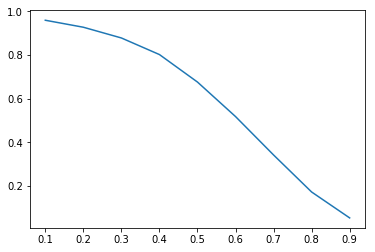

In [53]:
plt.plot(ratio,correct_label)#ratio--threhold,against percentage of correct labels  

Text(0.5, 1.0, 'Likelihood distribution for unlabelled examples')

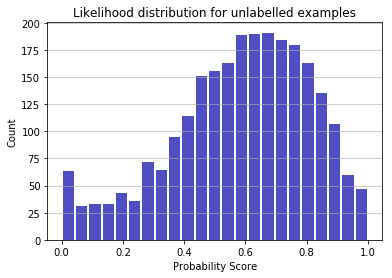

In [54]:
output2 = train2['output_bag_tree'].iloc[0:2500,].dropna() #prob distribution of 2500 substituted true labels
#plt.hist(output2)
#plt.show()
n, bins, patches = plt.hist(x= output2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
#plt.figure(figsize=(12,9))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Probability Score')
plt.ylabel('Count')
plt.title('Likelihood distribution for unlabelled examples')

In [56]:
import statistics
statistics.median(output2)

0.6094418664798102

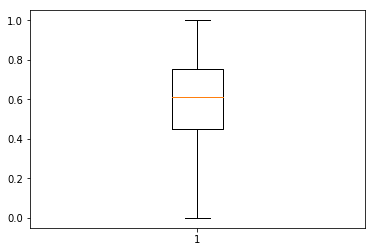

In [55]:
plt.boxplot(output2)
plt.show()